<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports-Libraries-and-Data" data-toc-modified-id="Imports-Libraries-and-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports Libraries and Data</a></span><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Import Data</a></span></li></ul></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#Data-Exploration/Visualization" data-toc-modified-id="Data-Exploration/Visualization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Exploration/Visualization</a></span><ul class="toc-item"><li><span><a href="#Are-the-peaks-of-our-data-around-holiday-dates-in-China?" data-toc-modified-id="Are-the-peaks-of-our-data-around-holiday-dates-in-China?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Are the peaks of our data around holiday dates in China?</a></span></li><li><span><a href="#Day-versus-Night-Air-Pollution" data-toc-modified-id="Day-versus-Night-Air-Pollution-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Day versus Night Air Pollution</a></span></li><li><span><a href="#Hourly-Air-Pollution-Trends?" data-toc-modified-id="Hourly-Air-Pollution-Trends?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Hourly Air Pollution Trends?</a></span></li><li><span><a href="#Daily-Air-Pollution-Trends?" data-toc-modified-id="Daily-Air-Pollution-Trends?-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Daily Air Pollution Trends?</a></span><ul class="toc-item"><li><span><a href="#Daily-Mean" data-toc-modified-id="Daily-Mean-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Daily Mean</a></span></li><li><span><a href="#Daily-Max" data-toc-modified-id="Daily-Max-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Daily Max</a></span></li></ul></li><li><span><a href="#Weekly-Air-Pollution-Trends?" data-toc-modified-id="Weekly-Air-Pollution-Trends?-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Weekly Air Pollution Trends?</a></span><ul class="toc-item"><li><span><a href="#Weekly-Mean" data-toc-modified-id="Weekly-Mean-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Weekly Mean</a></span></li><li><span><a href="#Weekly-Max" data-toc-modified-id="Weekly-Max-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Weekly Max</a></span></li></ul></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Naive-Forecasting" data-toc-modified-id="Naive-Forecasting-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Naive Forecasting</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#SARIMA-Model-(Seasonal-Autoregressive-Integrated-Moving-Average)" data-toc-modified-id="SARIMA-Model-(Seasonal-Autoregressive-Integrated-Moving-Average)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>SARIMA Model (Seasonal Autoregressive Integrated Moving Average)</a></span><ul class="toc-item"><li><span><a href="#Validating-the-Model---One-step-Ahead-Forecasting" data-toc-modified-id="Validating-the-Model---One-step-Ahead-Forecasting-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Validating the Model - One-step Ahead Forecasting</a></span></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Results</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

A company has tasked us to investigate the air quality in Gucheng area in China. We are given the data of the air quality measured hourly from March 1, 2013 to February 28, 2017. Our goal is to create a model that can predict the air pollution quality in Gucheng which is measured by the feature PM2.5 given the time period mentioned above. 

# Imports Libraries and Data

## Import Libraries

In [1]:
import pandas as pd
from pandas import Series
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
import datetime as dt
import collections
import itertools
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
plt.style.use('ggplot')

## Import Data

In [2]:
df = pd.read_csv('PRSA_Data_Gucheng_20130301-20170228.csv')
df.head(3)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng


Our data set is from [UC Irvine Repository](https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data). This data set includes hourly air pollutants data from Gucheng monitoring sites. The time period for this data set is from March 1st, 2013 to February 28th, 2017. Below are each features information:

* No: row number
* year: year of data in this row
* month: month of data in this row
* day: day of data in this row
* hour: hour of data in this row
* PM2.5: PM2.5 concentration (ug/m^3)
* PM10: PM10 concentration (ug/m^3)
* SO2: SO2 concentration (ug/m^3)
* NO2: NO2 concentration (ug/m^3)
* CO: CO concentration (ug/m^3)
* O3: O3 concentration (ug/m^3)
* TEMP: temperature (degree Celsius)
* PRES: pressure (hPa)
* DEWP: dew point temperature (degree Celsius)
* RAIN: precipitation (mm)
* wd: wind direction
* WSPM: wind speed (m/s)
* station: name of the air-quality monitoring site

For the extent of this project we will only be focusing on the feature PM2.5. PM2.5 represents particles that have diameter less than 2.5 micrometers which is more than 10 times thinner than a human hair. These particles are formed as a result of burning fuel and chemical reactions that take place in the atmosphere. It can be coal in a power plant or gasoline in your car. And at this small size, it can get deep into the lungs and bloodstream, and over time, it can destroy your body.

# Data Cleaning

In [3]:
#Investigating only time and the column PM2.5
df1 = pd.to_datetime(df[["year", "month", "day", "hour"]])
data = pd.concat([df1, df['PM2.5']], axis = 1)
data = data.rename(columns = {0: "Time", 'PM2.5': 'PM2.5'})
data.set_index('Time', inplace = True)
data.head()

,PM2.5
Time,
2013-03-01 00:00:00,6.0
2013-03-01 01:00:00,6.0
2013-03-01 02:00:00,5.0
2013-03-01 03:00:00,6.0
2013-03-01 04:00:00,5.0


In [4]:
#Check to see the number of missing values
data.isna().sum()

PM2.5    646
dtype: int64

In [5]:
#Perform forward filling of missing values
dataf = data.ffill()
#Check to see the number of missing values
dataf.isna().sum()

PM2.5    0
dtype: int64

# Data Exploration/Visualization

In [6]:
dataf.describe()

,PM2.5
count,35064.000000
mean,84.345203
std,83.228885
min,2.000000
25%,24.000000
50%,60.000000
75%,116.000000
max,770.000000


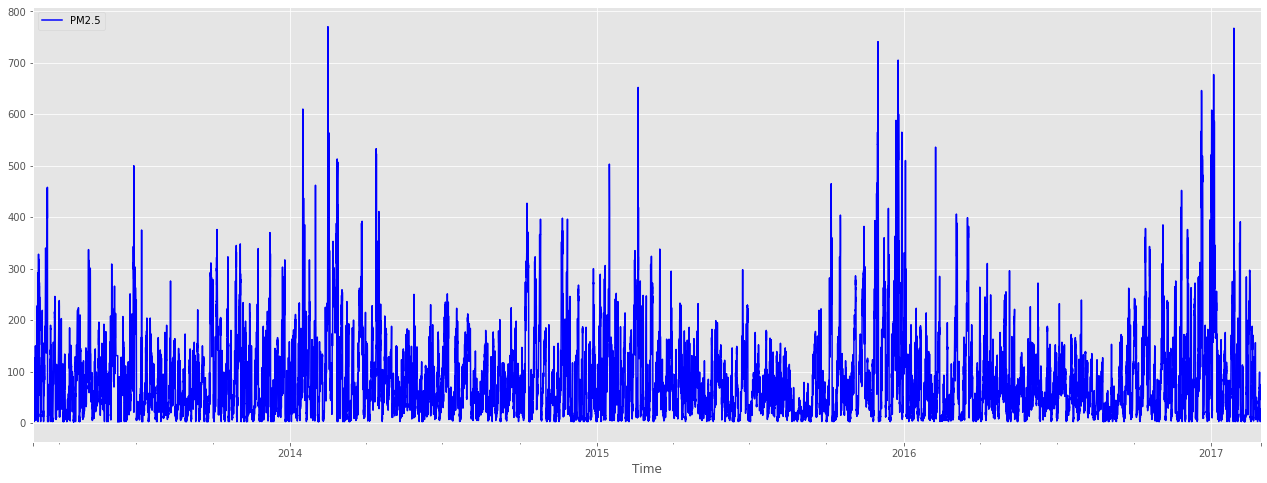

In [7]:
dataf.plot(figsize = (22,8), color = 'b')
plt.show()

Investigate the spikes in our data by looking at the time of the maximum values.

In [8]:
dataf.sort_values(by = 'PM2.5', ascending = False).head(20)

,PM2.5
Time,
2014-02-14 22:00:00,770.0
2017-01-28 02:00:00,767.0
2015-12-01 13:00:00,741.0
2017-01-28 01:00:00,739.0
2015-12-01 12:00:00,733.0
2015-12-25 11:00:00,705.0
2015-12-25 12:00:00,705.0
2015-12-25 13:00:00,680.0
2017-01-04 00:00:00,677.0


We can see majority of the biggest value takes place during the winter time in Gucheng, China. 

(Create a graph of the max values)

Based on this you can barely see if there are any seasonality or trends happening in this. Let's break down the data by looking at smaller parts of the data and seeing if there are any patterns along the way.

In [11]:
dataH = dataf.resample('D').mean()

In [12]:
def index_scale(plotnumber, data):
    """Plot Index Scale.
    
    Takes in a dataset to graph the PM2.5 scale on graph for comparison.
    
    Args:
        plotnumber: Corresponding plot number in the subplots of the graph.
        data: A dataframe of the the time window we want to graph.
    
    Returns: 
        A subplot of the data along with the PM2.5 scale on the graph for comparison.
    """
    axs[plotnumber].fill_between(x = data, y1 = 0, y2 = 12, alpha = 0.9, label = 'Good', color = 'g')
    axs[plotnumber].fill_between(x = data, y1 = 12.1, y2 = 35.4, label = 'Moderate', color = 'y')
    axs[plotnumber].fill_between(x = data, y1 = 35.5, y2 = 55.4, label = 'Unhealthy For Sensitive Group', color = 'orange')
    axs[plotnumber].fill_between(x = data, y1 = 55.5, y2 = 150.4, alpha = 0.7, label = 'Unhealthy', color = 'r')
    axs[plotnumber].fill_between(x = data, y1 = 150.5, y2 = 250.4, alpha = 0.7, label = 'Very Unhealthy', color = 'darkred')
    axs[plotnumber].fill_between(x = data, y1 = 250.5, y2 = 500.4, alpha = 0.4, label = 'Hazardous', color = 'black')
    axs[plotnumber].legend(loc = 'upper left', framealpha = 0.5)
    axs[plotnumber].set_xlabel('Year ' + data[0].strftime('%Y') + ' - Year ' + data[-1].strftime('%Y'))
    axs[plotnumber].set_ylabel('PM2.5 Index')

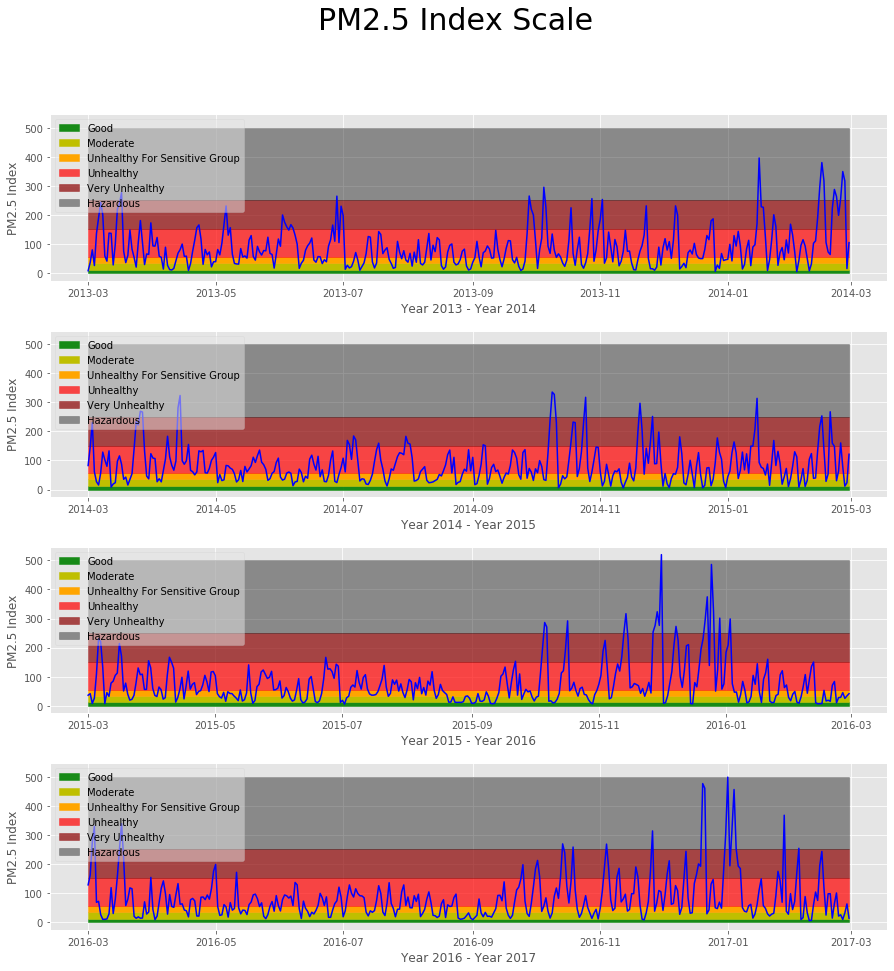

In [13]:
fig, axs = plt.subplots(4, sharey = True, figsize = (15, 15))
fig.suptitle('PM2.5 Index Scale', fontsize = 30)
fig.subplots_adjust(hspace = 0.3)
axs[0].plot(dataH['2013-03-01':'2014-02-28'], color = 'blue')
axs[1].plot(dataH['2014-03-01':'2015-02-28'], color = 'blue')
axs[2].plot(dataH['2015-03-01':'2016-02-29'], color = 'blue')
axs[3].plot(dataH['2016-03-01':'2017-02-28'], color = 'blue')

xdate0 = pd.date_range(start = "2013-03-01", end= "2014-02-28")
xdate1 = pd.date_range(start = '2014-03-01', end = '2015-02-28')
xdate2 = pd.date_range(start = '2015-03-01', end = '2016-02-29')
xdate3 = pd.date_range(start = '2016-03-01', end = '2017-02-28')

index_scale(0, xdate0)
index_scale(1, xdate1)
index_scale(2, xdate2)
index_scale(3, xdate3)

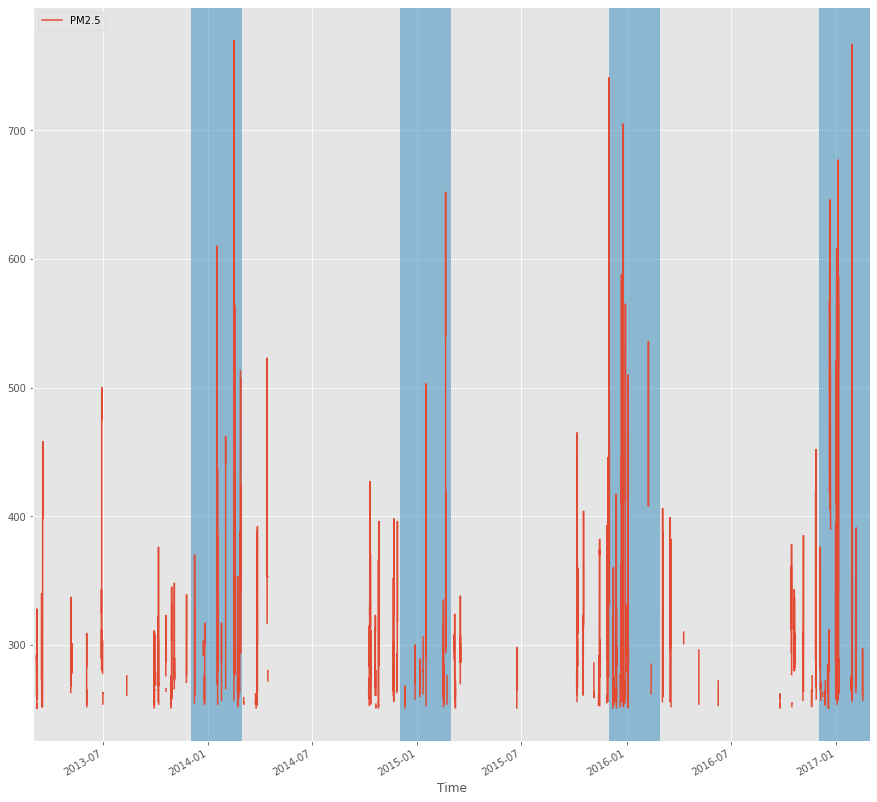

In [14]:
datadanger = dataf[dataf>250].sort_values(by = 'PM2.5', ascending = False)
datadanger.plot(figsize = (15, 15))
plt.axvspan(xmin = '2013-12-01', xmax = '2014-02-28', alpha = 0.5)
plt.axvspan(xmin = '2014-12-01', xmax = '2015-02-28', alpha = 0.5)
plt.axvspan(xmin = '2015-12-01', xmax = '2016-02-28', alpha = 0.5)
plt.axvspan(xmin = '2016-12-01', xmax = '2017-02-28', alpha = 0.5)

In [15]:
df2 = pd.to_datetime(df[["year", "month", "day", "hour"]])
datad = pd.concat([df2, df[['PM2.5', 'TEMP']]], axis = 1)
datad = datad.rename(columns = {0: "Time", 'PM2.5': 'PM2.5', 'TEMP': 'TEMPERATURE'})
datad.set_index('Time', inplace = True)
datad.head()

,PM2.5,TEMPERATURE
Time,,
2013-03-01 00:00:00,6.0,0.1
2013-03-01 01:00:00,6.0,-0.3
2013-03-01 02:00:00,5.0,-0.7
2013-03-01 03:00:00,6.0,-1.0
2013-03-01 04:00:00,5.0,-1.3


[Text(0, 0.5, 'Temperature'), Text(0.5, 0, 'Time')]

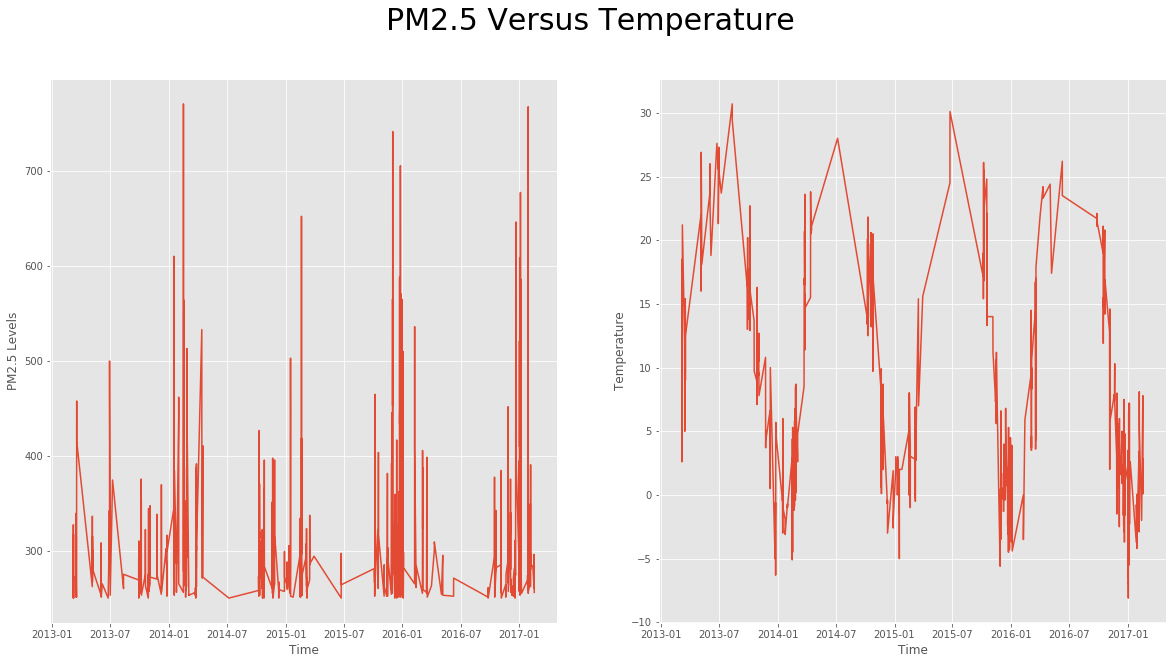

In [34]:
fig, axs = plt.subplots(1, 2, sharex = True, figsize = (20, 10))
fig.suptitle('PM2.5 Versus Temperature', size = 30)
axs[0].plot(datad[datad['PM2.5']>250]['PM2.5'])
axs[0].set(xlabel = ('Time'), ylabel = ('PM2.5 Levels'))
axs[1].plot(datad[datad['PM2.5']>250]['TEMPERATURE'])
axs[1].set(xlabel = ('Time'), ylabel = ('Temperature'))

## Are the peaks of our data around holiday dates in China?

I thought to myself the peaks seem to be located around Chinese New Year. It makes sense around Chinese New Year there are more fireworks going off causing an increase in our pollution index PM2.5. Now let's investigate to see if the dates with the highest daily average pollution index is a holiday or not.

In [133]:
#Listing public holidays starting 03-01-2013 to 02-28-2017
qing2013 = ['2013-04-04', '2013-04-06']
labour2013 = ['2013-04-29', '2013-05-01']
dragon2013 = ['2013-06-10', '2013-06-12']
mid2013 = ['2013-09-19', '2013-09-21']
national2013 = ['2013-10-01', '2013-10-07']
nyd2014 = ['2014-01-01', '2014-01-02']
cny2014 = ['2014-01-31', '2014-02-06']

qing2014 = ['2014-04-05', '2014-04-07']
labour2014 = ['2014-05-01', '2014-05-03']
dragon2014 = ['2014-05-31', '2014-06-02']
mid2014 = ['2014-09-06', '2014-09-08']
national2014 = ['2014-10-01', '2014-10-07']
nyd2015 = ['2015-01-01', '2015-01-03']
cny2015 = ['2015-02-18', '2015-02-24']

qing2015 = ['2015-04-05', '2015-04-06']
labour2015 = ['2015-05-01', '2015-05-03']
dragon2015 = ['2015-06-20', '2015-06-22']
mid2015 = ['2015-09-27', '2015-09-27']
national2015 = ['2015-10-01', '2015-10-07']
nyd2016 = ['2016-01-01', '2016-01-03']
cny2016 = ['2016-02-07', '2016-02-13']

qing2016 = ['2016-04-02', '2016-04-04']
labour2016 = ['2016-04-30', '2016-05-02']
dragon2016 = ['2016-06-09', '2016-06-11']
mid2016 = ['2016-09-15', '2016-09-17']
national2016 = ['2016-10-01', '2016-10-07']
nyd2017 = ['2016-12-31', '2017-01-02']
cny2017 = ['2017-01-27', '2017-02-02']

In [134]:
#List of holidays grouped by year cutoffs.
holidays2013 = [qing2013, labour2013, dragon2013, 
                mid2013, national2013, nyd2014, 
                cny2014]
holidays2014 = [qing2014, labour2014, dragon2014, 
                mid2014, national2014, nyd2015, 
                cny2015]
holidays2015 = [qing2015, labour2015, dragon2015, 
                mid2015, national2015, nyd2016, 
                cny2016]
holidays2016 = [qing2016, labour2016, dragon2016, 
                mid2016, national2016, nyd2017, 
                cny2017]

In [135]:
def plot_holiday(data, plotnumber):
    """Plot Index Scale.
    
    Takes in a dataset to graph the public holidays on graph for comparison.
    
    Args:
        plotnumber: Corresponding plot number in the subplots of the graph.
        data: List of holidays and its corresponding time frame.
    
    Returns: 
        A subplot of the data along with the public holidays on the graph for comparison.
    """
    
    holidaynames = ['QingMing Festival', 'Labour Day', 'Dragon Boat Festival',
                   'Mid-Autumn Festival', "National Day of the People's Republic of China",
                   'New Year Day', 'Chinese New Year']
    for holiday, date in zip(holidaynames, data):
        axs[plotnumber].fill_betweenx(x1 = date[0], x2 = date[1], y = [0, 500], label = holiday)
        axs[plotnumber].legend(loc = 'upper left', prop={"size":8}, framealpha = 0.2)
    axs[plotnumber].set_ylabel('PM2.5 Index')

Text(0.5, 0, 'Year 2016 - Year 2017')

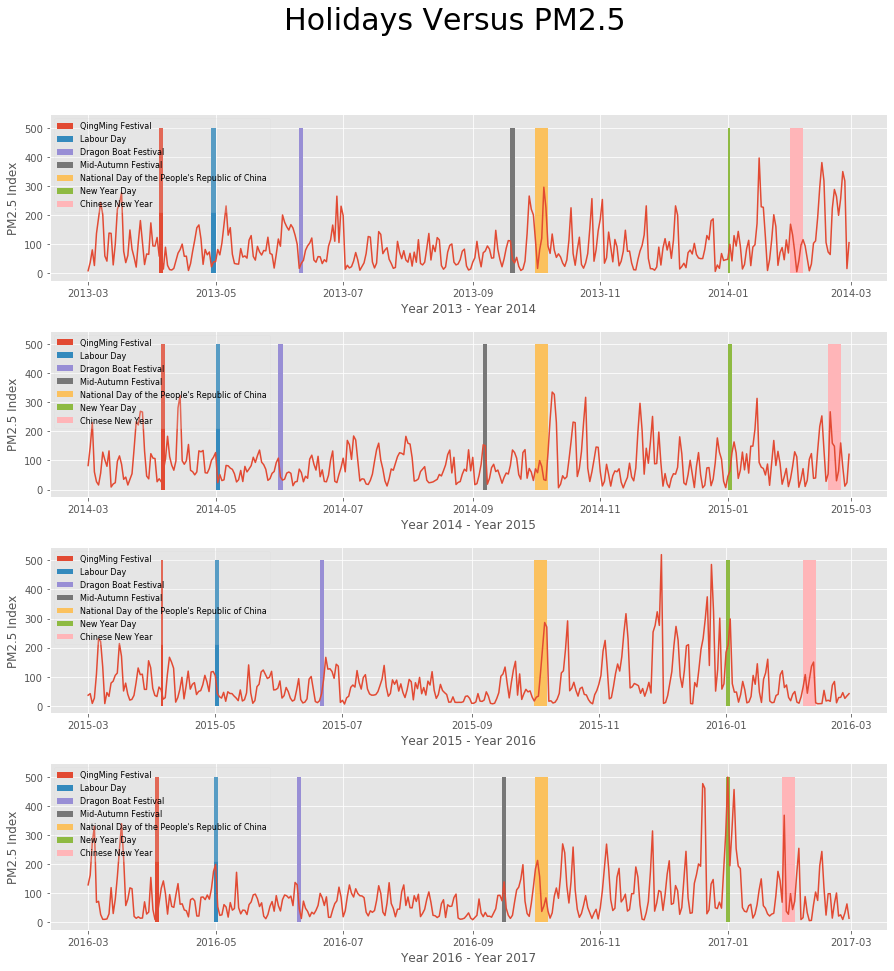

In [136]:
fig, axs = plt.subplots(4, sharey = True, figsize = (15, 15))
fig.suptitle('Holidays Versus PM2.5', fontsize = 30)
fig.subplots_adjust(hspace = 0.3)
axs[0].plot(dataH['2013-03-01':'2014-02-28'])
axs[1].plot(dataH['2014-03-01':'2015-02-28'])
axs[2].plot(dataH['2015-03-01':'2016-02-29'])
axs[3].plot(dataH['2016-03-01':'2017-02-28'])

plot_holiday(holidays2013, 0)
plot_holiday(holidays2014, 1)
plot_holiday(holidays2015, 2)
plot_holiday(holidays2016, 3)

axs[0].set_xlabel('Year 2013 - Year 2014')
axs[1].set_xlabel('Year 2014 - Year 2015')
axs[2].set_xlabel('Year 2015 - Year 2016')
axs[3].set_xlabel('Year 2016 - Year 2017')

Shown above is a graph of our data set and the boundaries for each public holiday in China. There seems to be an increase of the PM2.5 levels during and after New Years day. Other than that there is no overall pattern following any of the other public holiday mentioned above. There is no increase or decrease pattern in PM2.5 values over the years that we can see. However, if we have time in the future we can further investigate whether there are certain holidays that would have an effect on PM2.5 values. But let's take a look at day versuses night air pollutions.

## Day versus Night Air Pollution

Our assumption is that there our PM2.5 values should be higher in the day than at night. This is because there are more workers driving their cars to work in the day than at night. We will be checking out a 24 hour period on randomly chosen dates to see if there is a noticeable pattern for air pollution.

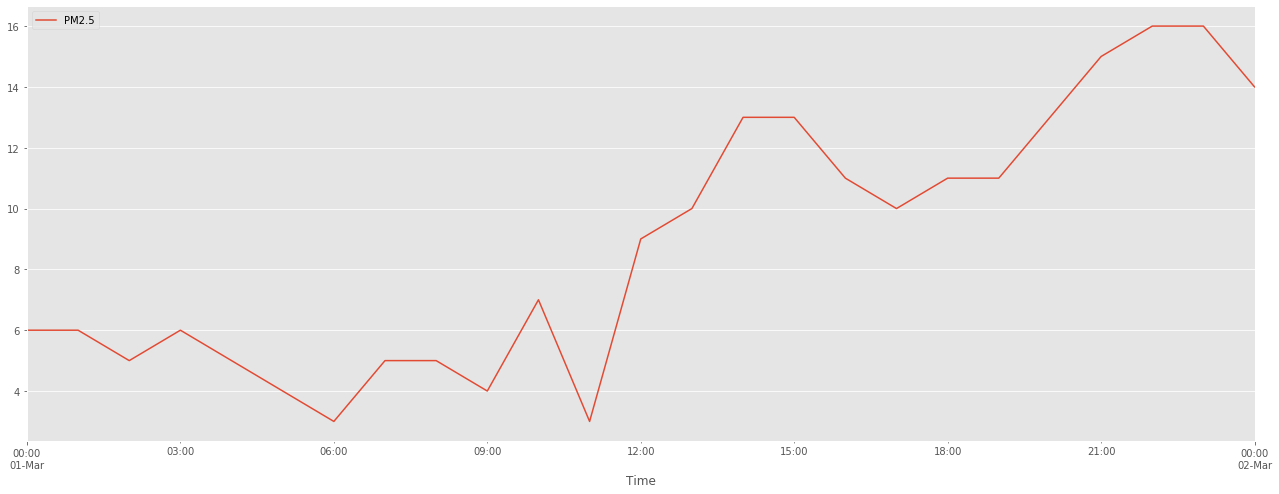

In [137]:
day1 = dataf.loc['2013-03-01 00:00:00':'2013-03-02 00:00:00']
day1.plot(figsize = (22,8))

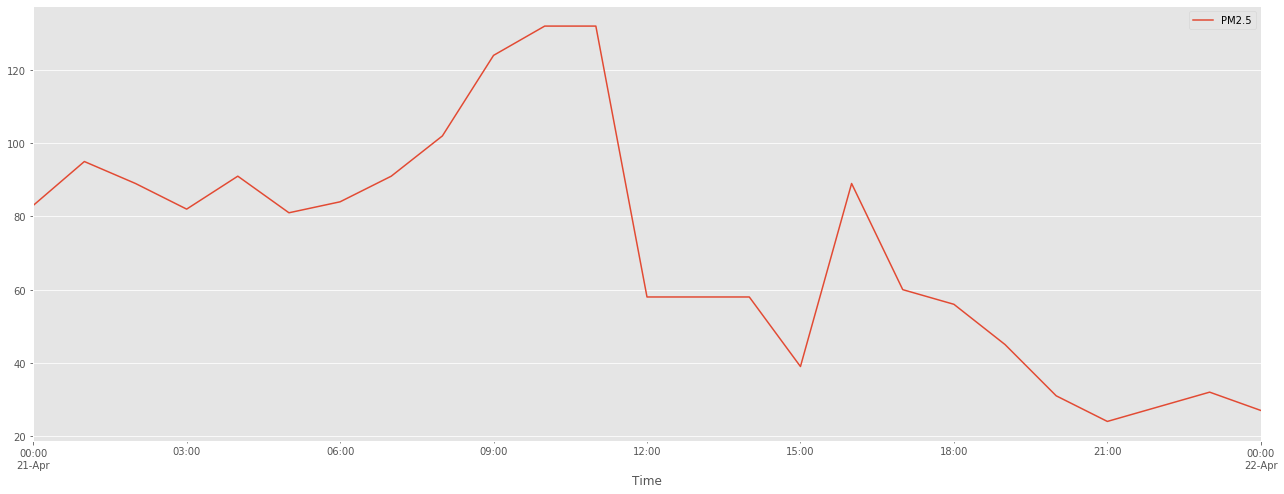

In [138]:
day2 = dataf.loc['2016-04-21 00:00:00':'2016-04-22 00:00:00']
day2.plot(figsize = (22,8))

We graphed two random dates March 1st, 2013 and April 22nd, 2016 hourly changes. We can see that from morning to night there is no pattern. As you can see the air pollution values are moving inversely from each other. Although these two random dates move inversely from each other, we can still take a look at the average of all the data for each hour. Perhaps this graph can share some information that we can not see in the two graphs above.

## Hourly Air Pollution Trends?

In [139]:
def trendexp(data, n, title):
    """Trend exploration of data.
    
    Takes in a dataset to create a rolling mean plot, time series decomposition 
    and perform a Dickey-Fuller test.
    
    Args:
        data: A dataframe of the data set you want to explore.
        n: size of the moving window. The number of observations used for 
           calculating the statistic.
        title: Title of your plots
    
    Returns: 
        A plot of the rolling mean, time series decomposition of the specified
        data set and the results of the Dickey-Fuller test on our data set.
    """
    
    print(title)
    #Performing rolling mean on the data with a window size of n
    roll_mean = data.rolling(window=n, center=False).mean()
    roll_std = data.rolling(window=n, center=False).std()

    fig = plt.figure(figsize=(12,6))
    plt.plot(data, color='blue',label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    print('-----------------------------------------------------------------')
    #Time Series Decomposition
    print('Time Series Decomposition: \n')
    decomposition = seasonal_decompose(data)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Plot gathered statistics
    plt.figure(figsize=(12,8))
    plt.subplot(411)
    plt.plot(data, label='Original', color='blue')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='blue')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color='blue')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='blue')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

    print('-----------------------------------------------------------------')
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test: \n')
    dftest = adfuller(data['PM2.5'])

    # Extract and display test results in a user friendly manner
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Hourly Data


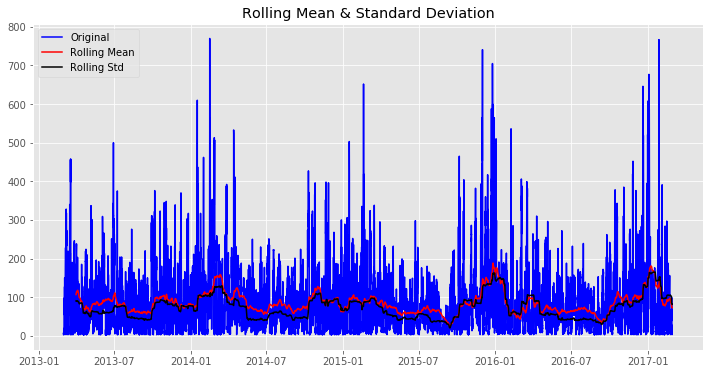

-----------------------------------------------------------------
Time Series Decomposition: 



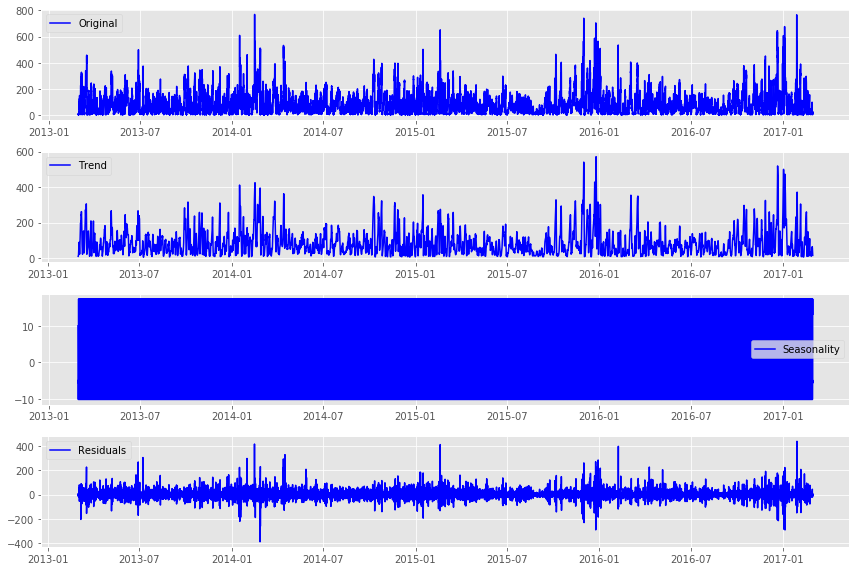

-----------------------------------------------------------------
Results of Dickey-Fuller Test: 

Test Statistic                   -18.847174
p-value                            0.000000
#Lags Used                        51.000000
Number of Observations Used    35012.000000
Critical Value (1%)               -3.430537
Critical Value (5%)               -2.861623
Critical Value (10%)              -2.566814
dtype: float64


In [140]:
#30 Days - 24H * 30 = 720H
trendexp(dataf, 720, 'Hourly Data')

Based off of the Dickey-Fuller test, we can see that the p-value is 0.000000 and therefore we conclude that the time series is stationary. This could be due to the massive about of data that we have. Therefore we will break it down and look at the time series with daily periods and weekly PM2.5 amounts.

## Daily Air Pollution Trends?

### Daily Mean

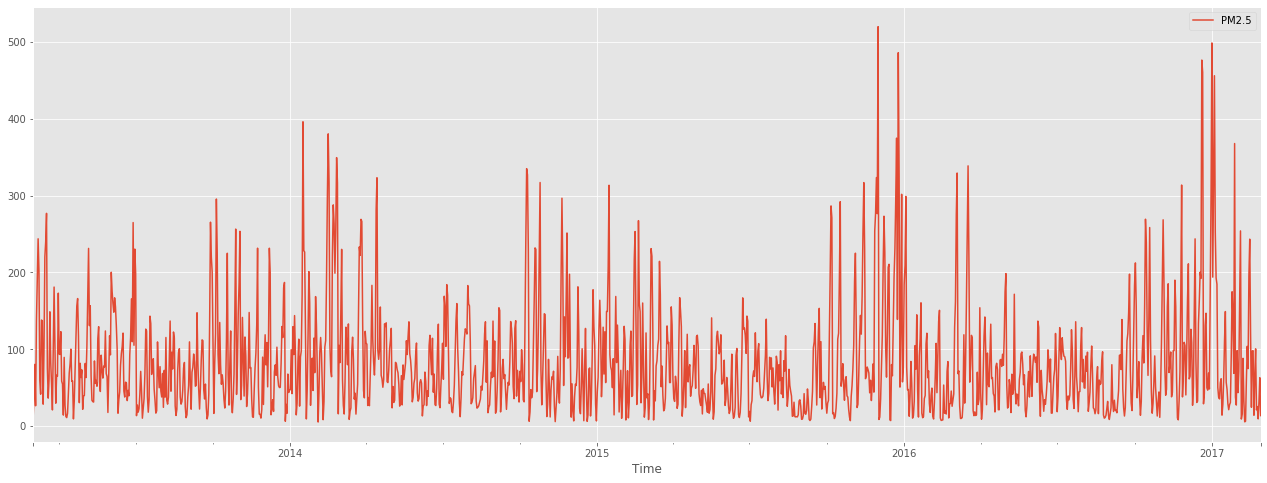

In [141]:
#Daily Mean Data Points
datad = dataf.resample('D').mean()
datad.plot(figsize = (22,8))
plt.show()

Daily Mean Data


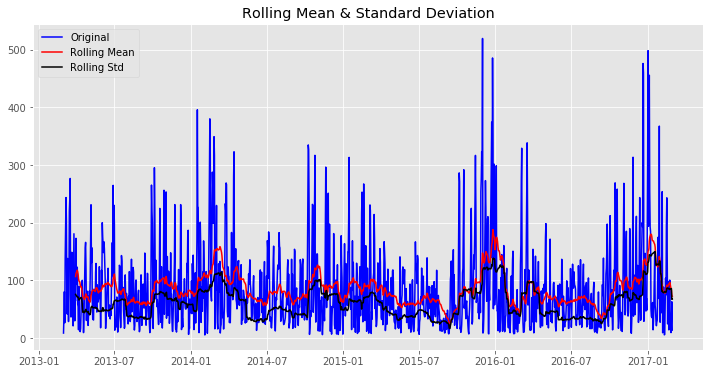

-----------------------------------------------------------------
Time Series Decomposition: 



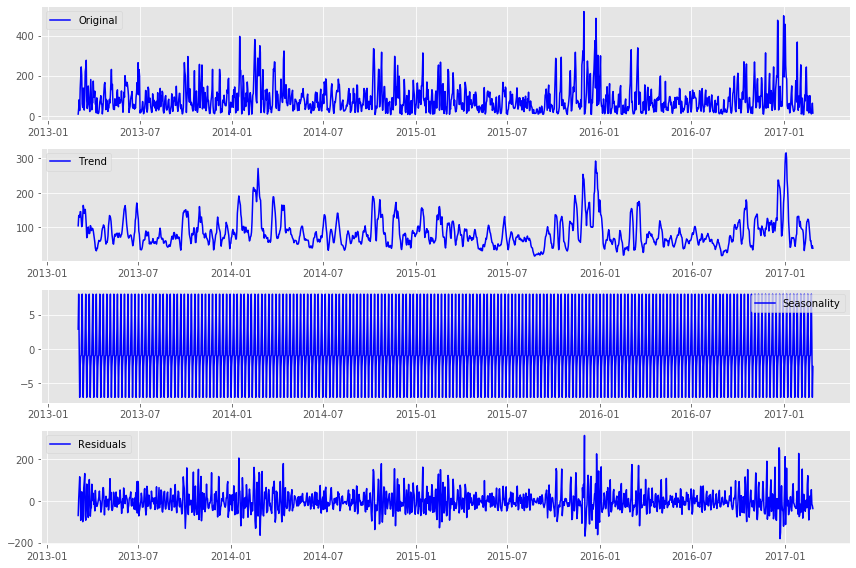

-----------------------------------------------------------------
Results of Dickey-Fuller Test: 

Test Statistic                -1.697466e+01
p-value                        9.105084e-30
#Lags Used                     2.000000e+00
Number of Observations Used    1.458000e+03
Critical Value (1%)           -3.434843e+00
Critical Value (5%)           -2.863524e+00
Critical Value (10%)          -2.567826e+00
dtype: float64


In [142]:
#30 Days
trendexp(datad, 30, 'Daily Mean Data')

After calculating the mean of each 24 hour period daily, we ran the data through a Dickey-Fuller Test. Our p-value is extremely small, and therefore we can conclude that our data is stationary.

### Daily Max

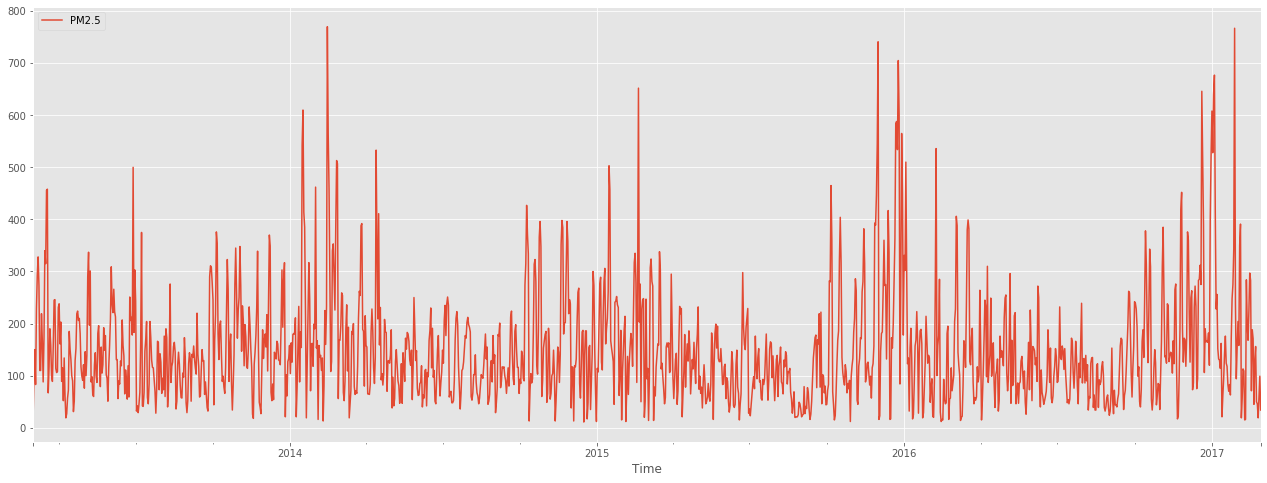

In [143]:
#Daily Max Data Points
datadm = dataf.resample('D').max()
datadm.plot(figsize = (22,8))
plt.show()

Daily Max Data


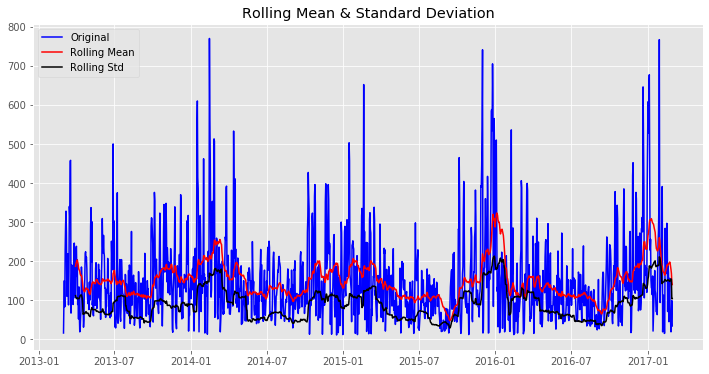

-----------------------------------------------------------------
Time Series Decomposition: 



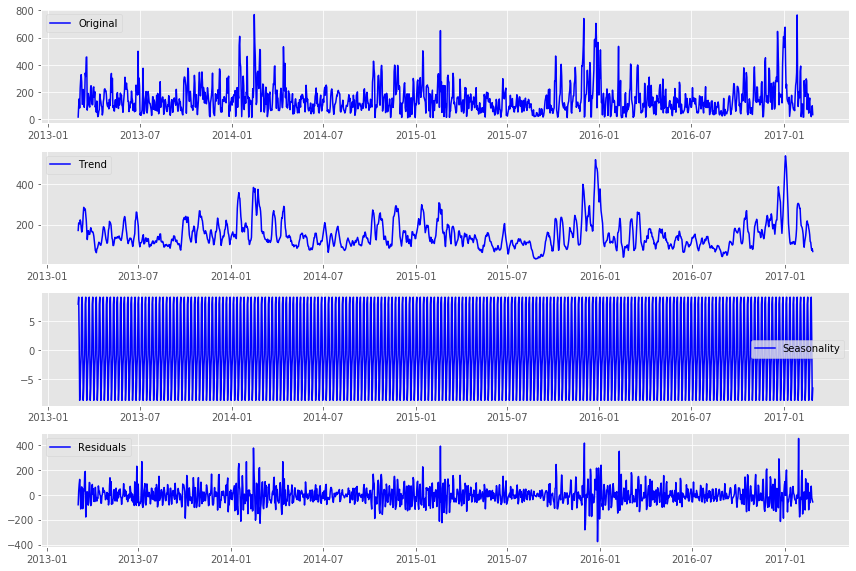

-----------------------------------------------------------------
Results of Dickey-Fuller Test: 

Test Statistic                -9.240930e+00
p-value                        1.583355e-15
#Lags Used                     8.000000e+00
Number of Observations Used    1.452000e+03
Critical Value (1%)           -3.434862e+00
Critical Value (5%)           -2.863533e+00
Critical Value (10%)          -2.567831e+00
dtype: float64


In [144]:
#30 days
trendexp(datadm, 30, 'Daily Max Data')

We then just took the maximum value of each day and tested for stationary. From the results above, we can conclude that our data is still stationary.

## Weekly Air Pollution Trends?

After investigating daily trends, we didn't find any trends. Next we will investigate if there are any weekly trends.

### Weekly Mean

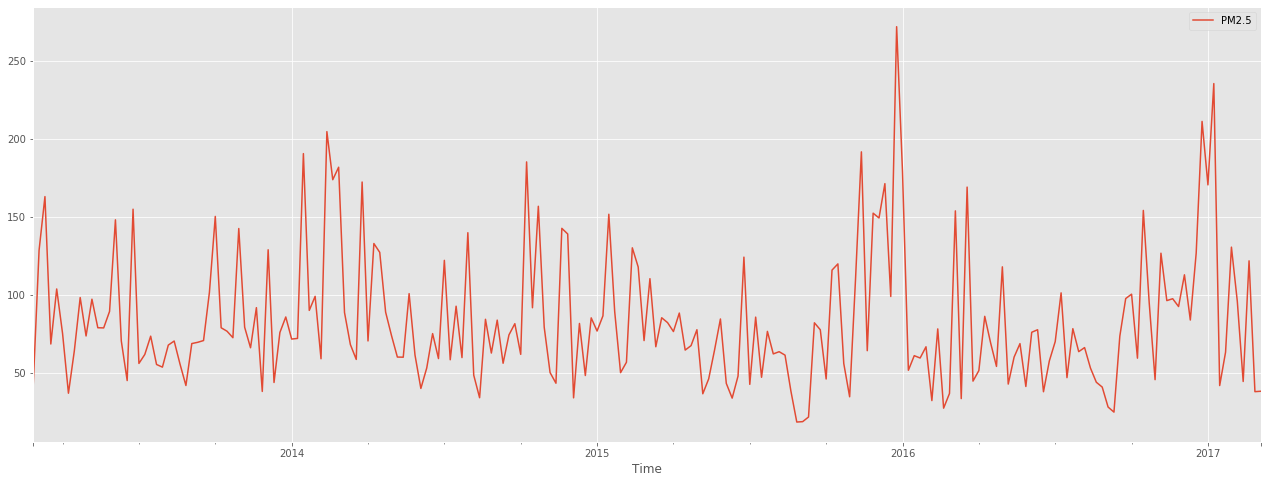

In [145]:
datawm = dataf.resample('W').mean()
datawm.plot(figsize = (22,8))
plt.show()

Weekly Mean Data


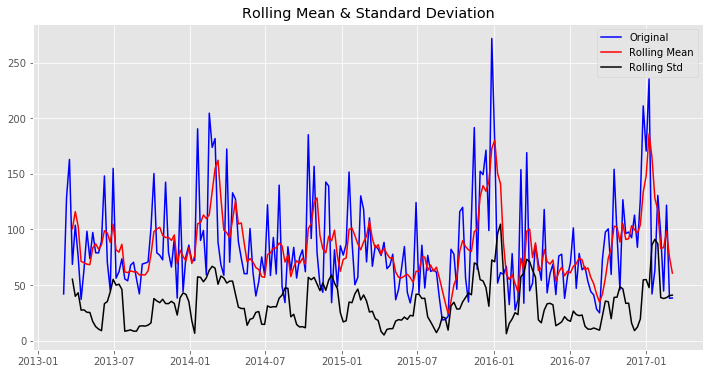

-----------------------------------------------------------------
Time Series Decomposition: 



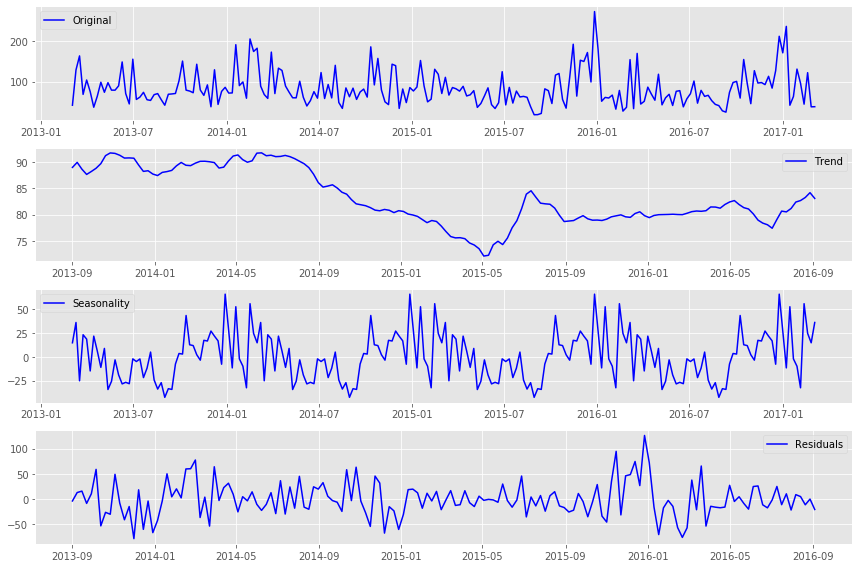

-----------------------------------------------------------------
Results of Dickey-Fuller Test: 

Test Statistic                  -5.073793
p-value                          0.000016
#Lags Used                       3.000000
Number of Observations Used    206.000000
Critical Value (1%)             -3.462499
Critical Value (5%)             -2.875675
Critical Value (10%)            -2.574304
dtype: float64


In [146]:
trendexp(datawm, 4, 'Weekly Mean Data')

### Weekly Max

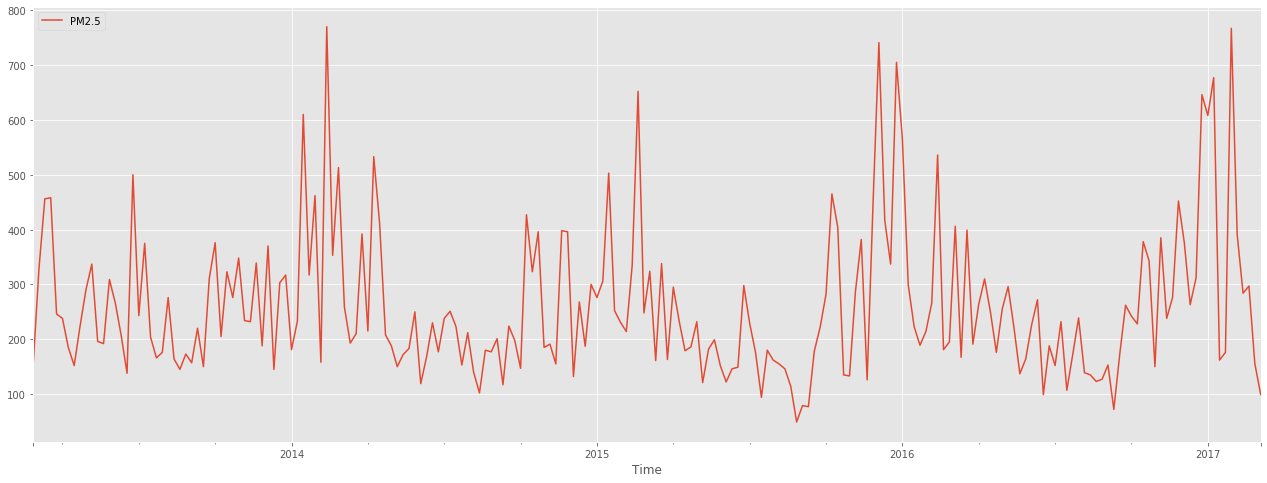

In [147]:
datawmax = dataf.resample('W').max()
datawmax.plot(figsize = (22,8))
plt.show()

Weekly Max Data


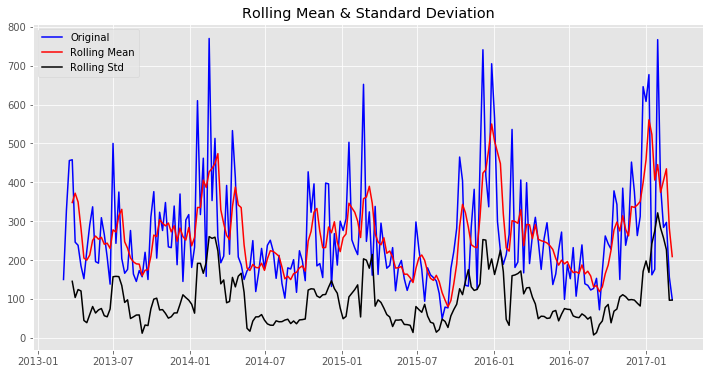

-----------------------------------------------------------------
Time Series Decomposition: 



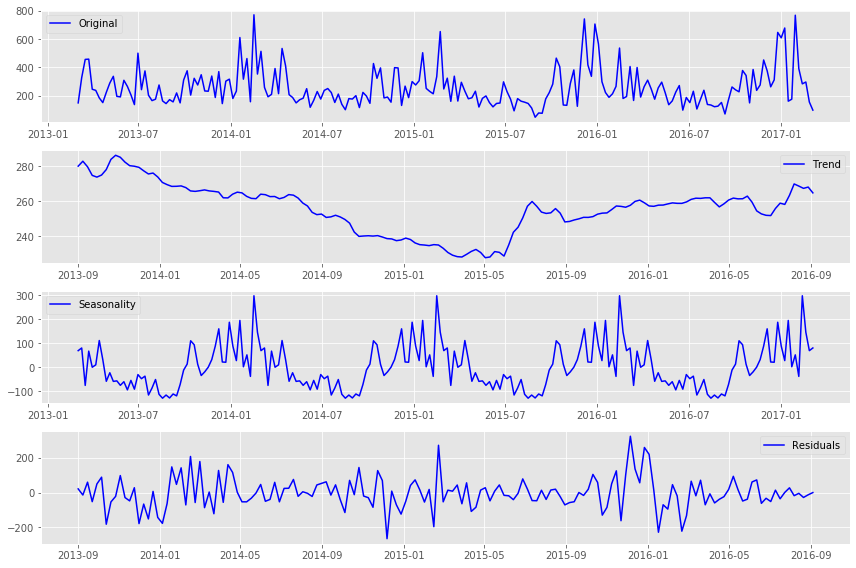

-----------------------------------------------------------------
Results of Dickey-Fuller Test: 

Test Statistic                  -4.567230
p-value                          0.000148
#Lags Used                       3.000000
Number of Observations Used    206.000000
Critical Value (1%)             -3.462499
Critical Value (5%)             -2.875675
Critical Value (10%)            -2.574304
dtype: float64


In [148]:
trendexp(datawmax, 4, 'Weekly Max Data')

As you can see we are having a hard time going past a p-value of 0.0002, so we can conclude that the time series is stationary. However, based on the time series decomposition above there is slight seasonality in our weekly data. Our next step is to start building a model to predict PM2.5, but we also need to keep note of the slight seasonality that we saw in the time series decomposition. Notice that since our time series is stationary, we don't need to remove any trends or seasonality when modeling. However, we will be using SARIMA model to see the effects of the seasonality that we saw in the time series decomposition.

# Modeling

For modeling we will be using the weekly data because here is when we saw slight seasonality that we would like to explore on. Our weekly data set contains 210 data points, we will be breaking up our data into 80-20. 168 data points for training and 42 data points for testing.

In [149]:
#Training - 168, Testing - 42
splitw = 168

#Training Data
time_trainw = datawm[:splitw].index.values
y_trainw = datawm[:splitw].values

#Testing Data
time_testw = datawm[splitw:].index.values
y_testw = datawm[splitw:].values

In [150]:
#Reshaping time data for modeling
time_trainw = time_trainw.reshape(-1, 1)
time_testw = time_testw.reshape(-1, 1)

## Naive Forecasting

In [151]:
#Using previous days result to forecast future
naive_forecastw = datawm[splitw - 1:- 1].values
errorsw = naive_forecastw - y_testw

msew = np.square(errorsw).mean()
rmsew = np.sqrt(msew)
rmsew

51.64681188328657

Our root mean squared error is 51.64, which means that our model can predict PM2.5 values within 51.64 confidence interval. Below is a graph of our data and our predictions from the Naive Forecasting Model.

Text(0.5, 1.0, 'Naive Forecasting')

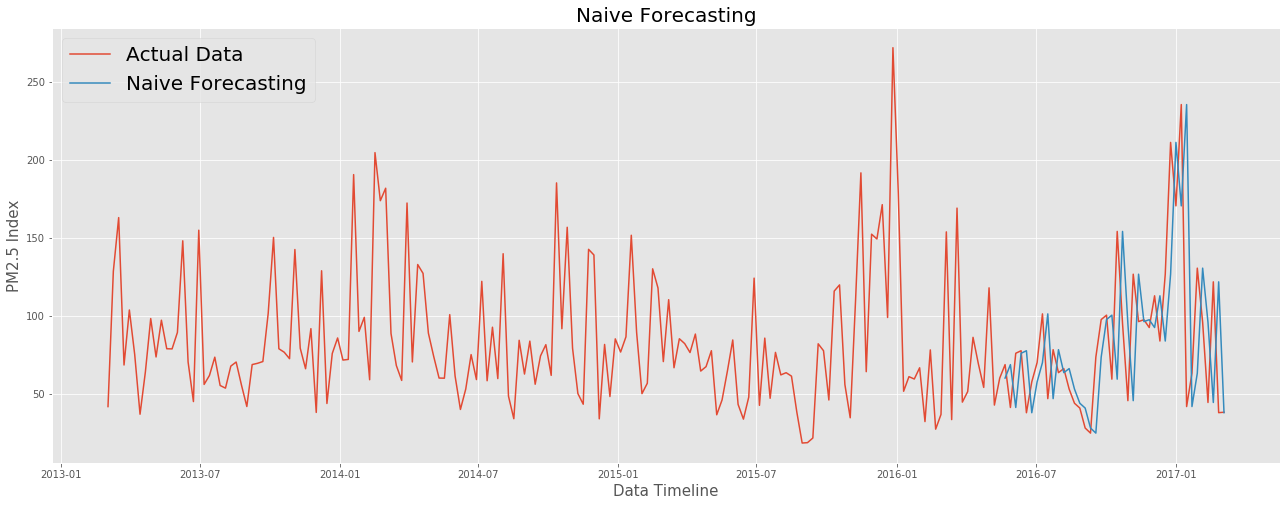

In [152]:
graphn = pd.DataFrame(list(zip(datawm[splitw:].index, datawm[splitw-1:-1].values)), columns = ['Time', 'Val'])
graphn.set_index('Time', inplace = True)

plt.figure(figsize = (22, 8))
plt.plot(datawm, label = 'Actual Data')
plt.plot(graphn, label = 'Naive Forecasting')
plt.legend(loc = 'upper left', fontsize = 20)
plt.xlabel('Data Timeline', fontsize = 15)
plt.ylabel('PM2.5 Index', fontsize = 15)
plt.title('Naive Forecasting', fontsize = 20)

## Linear Regression

In [153]:
X_testw = pd.DataFrame(time_testw)

X_testw.columns = ["Date"]
X_testw['Date'] = pd.to_datetime(X_testw['Date'])
X_testw['Date']=X_testw['Date'].map(dt.datetime.toordinal)

In [154]:
regressor = LinearRegression()
regressor.fit(time_trainw, y_trainw)

LinearRegression()

In [155]:
y_test_predw = regressor.predict(X_testw)
errors_linearw = y_test_predw - y_testw

mselw = np.square(errors_linearw).mean()
rmselw = np.sqrt(mselw)
rmselw

113.70793479301253

Our root mean squared error is 113.71, which means that our model can predict PM2.5 values within 113.71 confidence interval. The linear regression model performed a lot worser than the Naive Forecasting Model. Below is a graph of our data and our predictions from the Linear Regression Model.

Text(0.5, 1.0, 'Linear Regression')

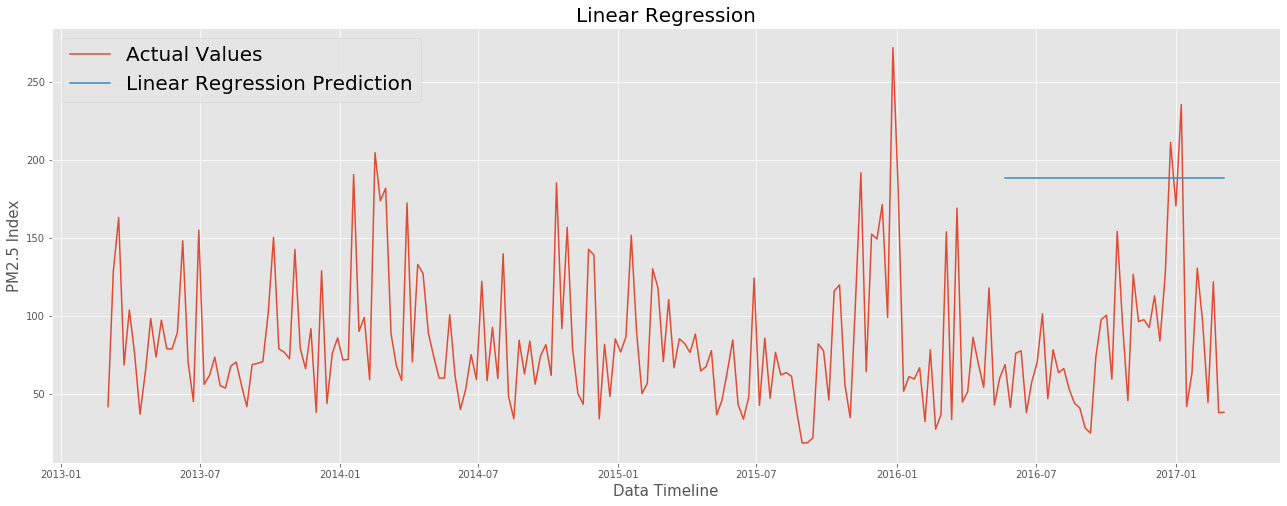

In [156]:
graphw = pd.DataFrame(list(zip(datawm[splitw:].index, y_test_predw)), columns = ['Time', 'Val'])
graphw.set_index('Time', inplace = True)
plt.figure(figsize = (22, 8))
plt.plot(datawm, label = 'Actual Values')
plt.plot(graphw, label = 'Linear Regression Prediction')
plt.legend(loc = 'upper left', fontsize = 20)
plt.xlabel('Data Timeline', fontsize = 15)
plt.ylabel('PM2.5 Index', fontsize = 15)
plt.title('Linear Regression', fontsize = 20)

## SARIMA Model (Seasonal Autoregressive Integrated Moving Average)

In [157]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [158]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(datawm,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
#             print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

In [159]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 1)
pdqs    (1, 1, 1, 52)
aic           1115.64
Name: 63, dtype: object

In [160]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(datawm, 
                                        order=(1, 1, 1), 
                                        seasonal_order=(1, 1, 1, 52), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1028      0.087      1.176      0.239      -0.068       0.274
ma.L1         -1.0000    135.752     -0.007      0.994    -267.068     265.068
ar.S.L52   -6.972e-05      0.374     -0.000      1.000      -0.733       0.733
ma.S.L52      -0.4247      0.401     -1.060      0.289      -1.210       0.360
sigma2      2602.7541   3.53e+05      0.007      0.994    -6.9e+05    6.95e+05


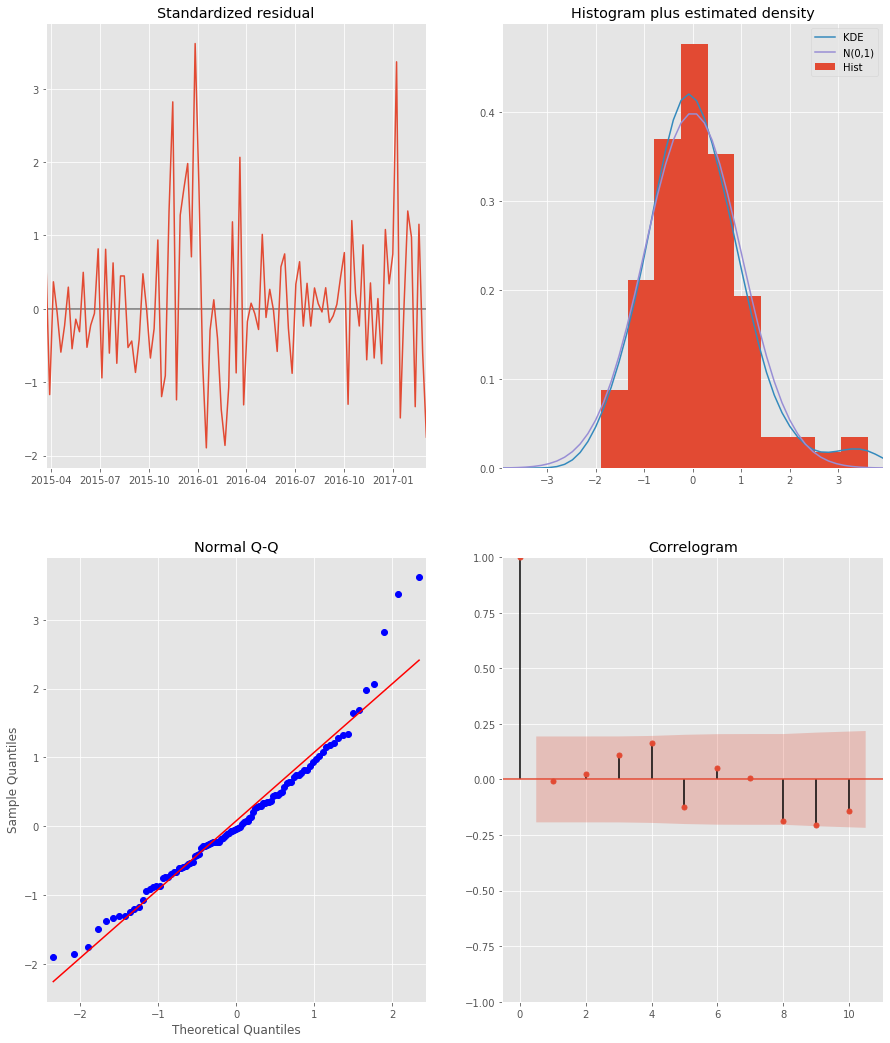

In [161]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

### Validating the Model - One-step Ahead Forecasting

In [162]:
# Get predictions starting from 01-03-2016 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2016-01-03'), dynamic=False)
pred_conf = pred.conf_int()

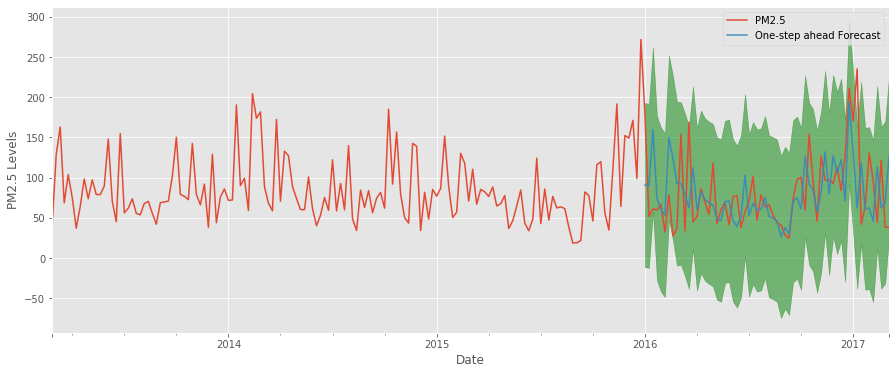

In [163]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = datawm['2013-03-03':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('PM2.5 Levels')
plt.legend()

plt.show()

In [164]:
# Get the real and predicted values
PM_forecasted = pred.predicted_mean.values
PM_truth = datawm['2016-01-03':].values

# Compute the mean square error
msePM = ((PM_forecasted - PM_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(msePM, 2)))
rmsePM = np.sqrt(msePM)
rmsePM

The Mean Squared Error of our forecasts is 3211.26


56.667992479412725

Our root mean squared error is 56.66, which means that our model can predict PM2.5 values within 56.66 confidence interval. The SARIMA model performed a lot better than the Linear Regression Model, but slightly worser than the Naive Forecasting Model. Below is a graph of our data and our predictions from the Linear Regression Model.

Text(0.5, 1.0, 'SARIMA Model')

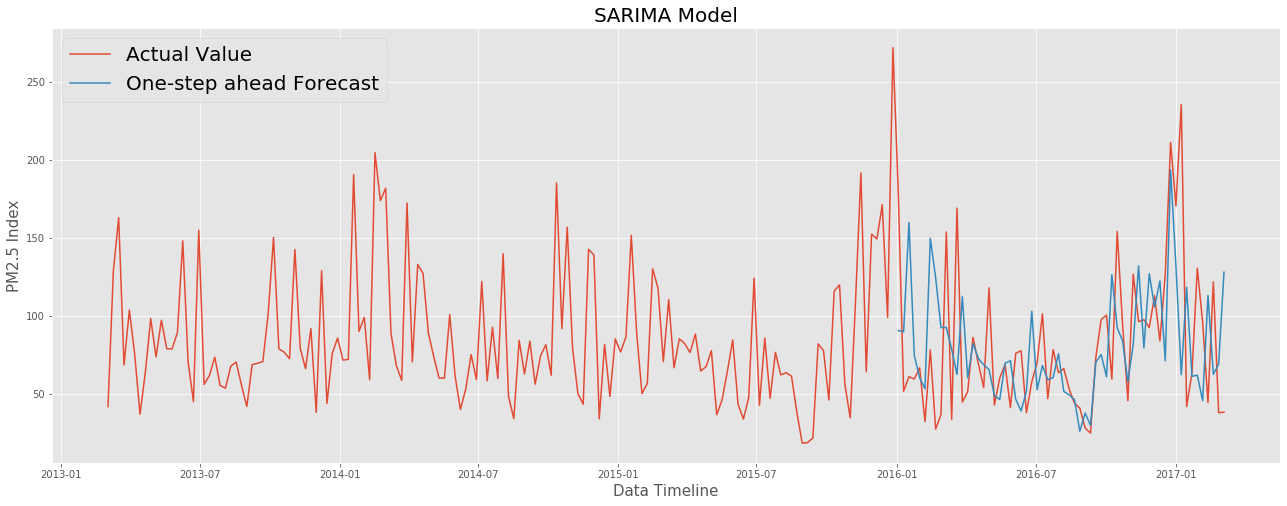

In [165]:
plt.figure(figsize = (22, 8))
# Plot observed values
plt.plot(datawm['2013-03-03':], label = 'Actual Value')
# # Plot predicted values
plt.plot(pred.predicted_mean, label = 'One-step ahead Forecast')
plt.legend(loc = 'upper left', fontsize = 20)
plt.xlabel('Data Timeline', fontsize = 15)
plt.ylabel('PM2.5 Index', fontsize = 15)
plt.title('SARIMA Model', fontsize = 20)

## Results

In [166]:
models = ['Naive Forecasting', 'Lienar Model', 'SARIMA Model']
rmses = [round(rmsew, 2), round(rmselw, 2), round(rmsePM, 2)]
results = pd.DataFrame(list(zip(models, rmses)), 
                       columns =['Model Name', 'RMSE Values'])
results.set_index('Model Name', inplace = True)
results

,RMSE Values
Model Name,
Naive Forecasting,51.65
Lienar Model,113.71
SARIMA Model,56.67


# Conclusion 

To summarize everything above, we first explored the following and its relationship to Gucheng's PM2.5 levels.

* Public Holidays

* Day/Night levels

We concluded that there wasn't any specific pattern that stood out in our visualizations. However, there are things we can further explore given more time such as holidays that are specific to Gucheng region.

After that we explored the stationary patterns in our data and found that there was slight stationary in our weekly data.

Finally we did modeling on our data. Below are the three model's results.
* Naive Forecasting Model - RMSE = 51.64

* Linear Regression Model - RMSE = 113.71

* SARIMA Model - RMSE = 56.67

As you can see the best model that we have is Naive Forecasting Model. 